In [1]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [10]:
# pip install chardet

  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
Using cached chardet-5.2.0-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
# import chardet

# with open('passaros_imagens/aves_sao_paulo_lista.csv', 'rb') as f:
#     result = chardet.detect(f.read())
#     print(result['encoding'])


ISO-8859-1


In [40]:
df = pd.read_csv('aves_listas_wikiaves_min_100_fotos.csv', encoding='ISO-8859-1')  # or the detected encoding
df =df.dropna()
df['Nome Comum (Espécie)'] = df['Nome Comum'] + ' ' + '(' + df['Espécie'] + ')'
df

,Espécie,Nome Comum,Sons,Fotos,Nome Comum (Espécie)
0,Sicalis flaveola,canário-da-terra,234.0,11147.0,canário-da-terra (Sicalis flaveola)
1,Dacnis cayana,saí-azul,57.0,9870.0,saí-azul (Dacnis cayana)
2,Thraupis sayaca,sanhaço-cinzento,252.0,9224.0,sanhaço-cinzento (Thraupis sayaca)
3,Tachyphonus coronatus,tiê-preto,305.0,8499.0,tiê-preto (Tachyphonus coronatus)
4,Pitangus sulphuratus,bem-te-vi,376.0,8437.0,bem-te-vi (Pitangus sulphuratus)
...,...,...,...,...,...
680,Podiceps occipitalis,mergulhão-de-orelha-amarela,0.0,110.0,mergulhão-de-orelha-amarela (Podiceps occipitalis)
681,Pulsatrix perspicillata,murucututu,11.0,108.0,murucututu (Pulsatrix perspicillata)
682,Pteroglossus aracari,araçari-de-bico-branco,5.0,105.0,araçari-de-bico-branco (Pteroglossus aracari)
683,Thalassarche melanophris,albatroz-de-sobrancelha,4.0,103.0,albatroz-de-sobrancelha (Thalassarche melanophris)


In [34]:
import os
#bing subscription ID ac060900e9bc4550b4b53280cede638f https://pub.aimind.so/build-your-dataset-with-bing-search-api-1adf6b550a3c - I have a brunicar@gmail and a bioprograma subscription
key = os.environ.get('AZURE_SEARCH_KEY', 'f26b97fd75ac4608b97253b7fecd2dac')

In [35]:
results = search_images_bing(key, 'canario')
ims = results.attrgot('contentUrl')
len(ims)

150

In [ ]:
bird_types = df['Nome Comum (Espécie)']
path = Path('path')
if not path.exists():
    path.mkdir()
    for o in bird_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}', max_images=150)
        download_images(dest, urls=results.attrgot('contentUrl'))
        

In [2]:
path = Path('aves_especies_50_cada/')
fns = get_image_files(path)
fns

(#32923) [Path('aves_especies_50_cada/Aburria jacutinga (jacutinga)/05731b30-0996-42fd-bb36-843f9eaefea3.jpg'),Path('aves_especies_50_cada/Aburria jacutinga (jacutinga)/0b6a85bc-314c-47c8-9dbf-5478398a2d2e.jpg'),Path('aves_especies_50_cada/Aburria jacutinga (jacutinga)/0e92579e-1225-47d7-a945-bd7fdff64b4e.jpg'),Path('aves_especies_50_cada/Aburria jacutinga (jacutinga)/15580ce2-ea3f-4150-8237-0ef97cd93975.jpg'),Path('aves_especies_50_cada/Aburria jacutinga (jacutinga)/15a891b2-866a-4b2f-9cf3-0b196fcac4df.jpg'),Path('aves_especies_50_cada/Aburria jacutinga (jacutinga)/1f3e0cad-324b-4ddb-92e3-16d0db4ea951.jpg'),Path('aves_especies_50_cada/Aburria jacutinga (jacutinga)/25e2ff33-5f29-44ee-b672-f1a0642f5974.jpg'),Path('aves_especies_50_cada/Aburria jacutinga (jacutinga)/31762d6f-59f9-48a8-b4a2-bd2567ab54bd.jpg'),Path('aves_especies_50_cada/Aburria jacutinga (jacutinga)/33522fb9-5963-4e12-b92d-9aecddf2d9bb.jpg'),Path('aves_especies_50_cada/Aburria jacutinga (jacutinga)/351d3eb0-773d-44cd-b97a

In [3]:
failed = verify_images(get_image_files(path))
len(failed)

0

Often when we download files from the internet, there are a few that are corrupt. Let's check:

To remove all the failed images, you can use `unlink` on each of them. Note that, like most fastai functions that return a collection, `verify_images` returns an object of type `L`, which includes the `map` method. This calls the passed function on each element of the collection:

In [4]:
failed.map(Path.unlink)

(#0) []

In [5]:
birds = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [6]:

dls = birds.dataloaders(path)

A `DataLoaders` includes validation and training `DataLoader`s. `DataLoader` is a class that provides batches of a few items at a time to the GPU. We'll be learning a lot more about this class in the next chapter. When you loop through a `DataLoader` fastai will give you 64 (by default) items at a time, all stacked up into a single tensor. We can take a look at a few of those items by calling the `show_batch` method on a `DataLoader`:

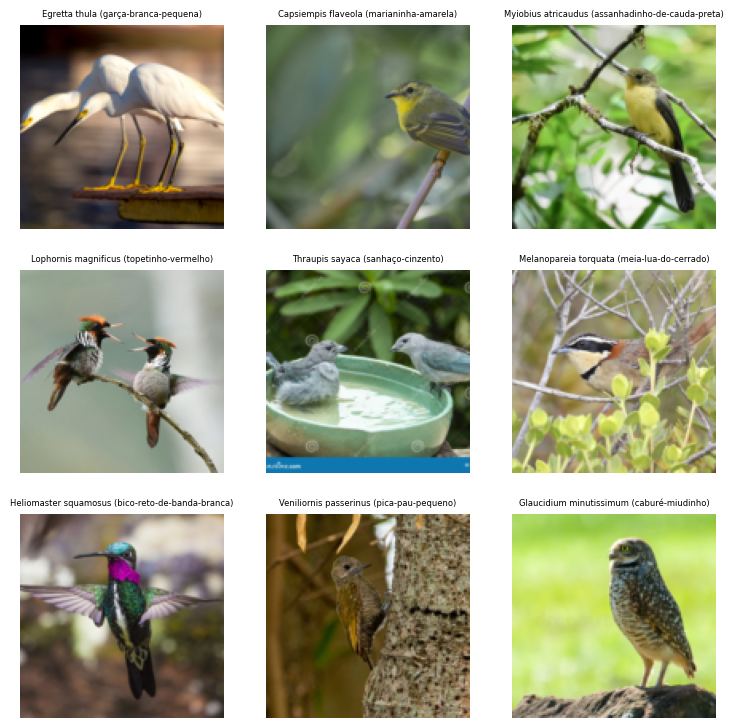

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 5 # Set the global font size
dls.show_batch()


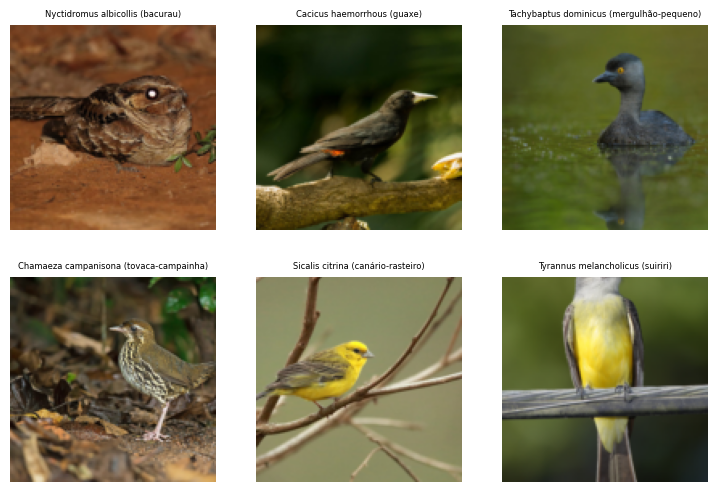

In [8]:
dls.valid.show_batch(max_n=6, nrows=2)

We used `unique=True` to have the same image repeated with different versions of this `RandomResizedCrop` transform. This is a specific example of a more general technique, called data augmentation.

### Data Augmentation

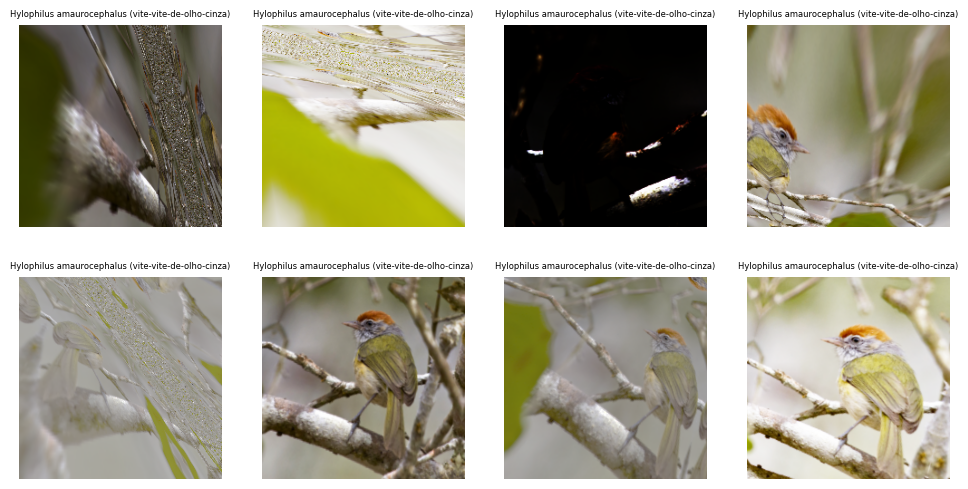

In [9]:
plt.rcParams['font.size'] = 5 # Set the global font size
birds = birds.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(mult=2))
dls = birds.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Now that we have assembled our data in a format fit for model training, let's actually train an image classifier using it.

## Training Your Model, and Using It to Clean Your Data

Time to use the same lines of code as in <<chapter_intro>> to train our bear classifier.

We don't have a lot of data for our problem (150 pictures of each sort of bear at most), so to train our model, we'll use `RandomResizedCrop` with an image size of 224 px, which is fairly standard for image classification, and default `aug_transforms`:

In [10]:
#check if I have a cuda device (GPU)
import torch
torch.cuda.device(0)
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce RTX 3060 Laptop GPU


In [11]:
#Code by Ignacio Oguiza posted at https://forums.fast.ai/t/plotting-metrics-after-learning/69937/2
#Code to generate plots of learning metrics
# from matplotlib import pyplot as plt
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()
   

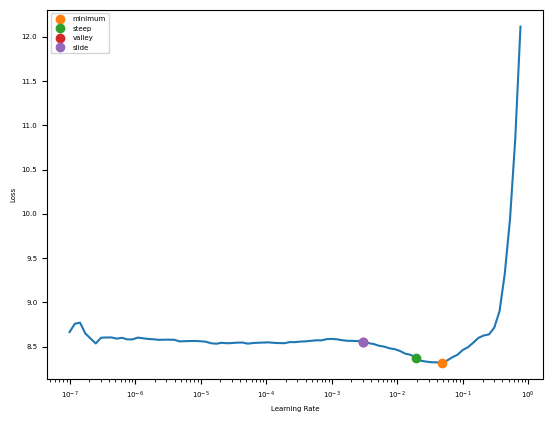

In [16]:
# # try to find the best learning using this https://docs.fast.ai/tutorial.vision.html
# learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])
# lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

We can now create our `Learner` and fine-tune it in the usual way:

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,6.205603,4.123288,0.173603,0.826397,18:03


C:\Users\bruni\miniconda3\envs\fastai_2\Lib\site-packages\PIL\TiffImagePlugin.py:935: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,4.974053,3.179170,0.327612,0.672388,17:32
1,4.384922,2.594492,0.433779,0.566221,15:49
2,3.912168,2.116330,0.489976,0.510024,15:49
3,3.650288,1.881138,0.535996,0.464004,15:49
4,3.432052,1.736870,0.548906,0.451094,17:21
5,3.253905,1.538263,0.600395,0.399605,17:44
6,3.054803,1.486444,0.602825,0.397175,17:35
7,2.888755,1.335497,0.641707,0.358293,17:53
8,2.801531,1.284507,0.655680,0.344320,17:04
9,2.581470,1.149259,0.688032,0.311968,16:19


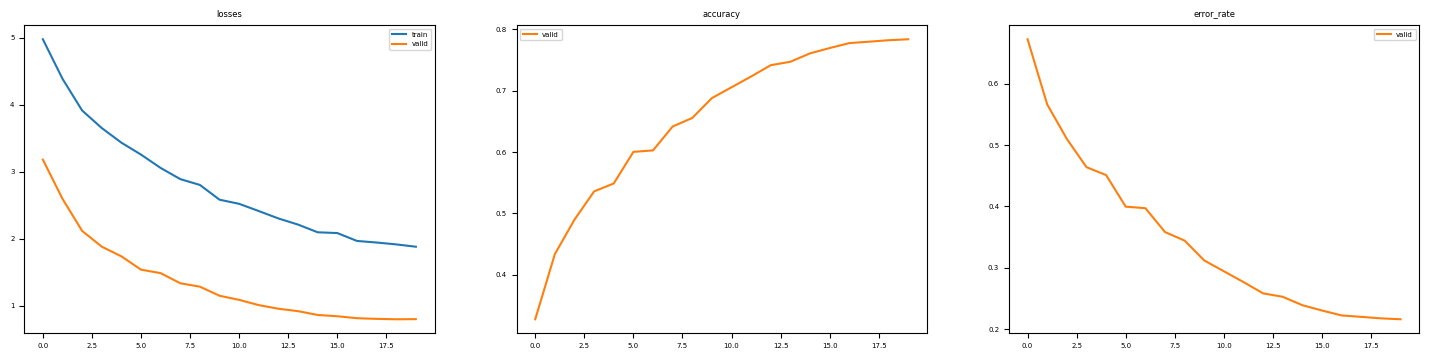

In [13]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])
learn.fine_tune(20)
learn.recorder.plot_metrics()

Now let's see whether the mistakes the model is making are mainly thinking that grizzlies are teddies (that would be bad for safety!), or that grizzlies are black bears, or something else. To visualize this, we can create a *confusion matrix*:

## Turning Your Model into an Online Application

We are now going to look at what it takes to turn this model into a working online application. We will just go as far as creating a basic working prototype; we do not have the scope in this book to teach you all the details of web application development generally.

### Using the Model for Inference

Once you've got a model you're happy with, you need to save it, so that you can then copy it over to a server where you'll use it in production. Remember that a model consists of two parts: the *architecture* and the trained *parameters*. The easiest way to save the model is to save both of these, because that way when you load a model you can be sure that you have the matching architecture and parameters. To save both parts, use the `export` method.

This method even saves the definition of how to create your `DataLoaders`. This is important, because otherwise you would have to redefine how to transform your data in order to use your model in production. fastai automatically uses your validation set `DataLoader` for inference by default, so your data augmentation will not be applied, which is generally what you want.

When you call `export`, fastai will save a file called "export.pkl":

In [ ]:

learn.export('aves_especies_50_max_cada_default_ln_rate.pkl')

Let's check that the file exists, by using the `ls` method that fastai adds to Python's `Path` class:

In [15]:
path = Path()
path.ls(file_exts='.pkl')

(#8) [Path('aves_especies_150_max_cada.pkl'),Path('aves_especies_50_max_cada.pkl'),Path('aves_especies_50_max_cada_default_ln_rate.pkl'),Path('aves_sp_50_cada_model.pkl'),Path('benign_malignant.pkl'),Path('BRCA_histological_subtypes_model.pkl'),Path('export.pkl'),Path('is_it_a_bird.pkl')]

You'll need this file wherever you deploy your app to. For now, let's try to create a simple app within our notebook.

When we use a model for getting predictions, instead of training, we call it *inference*. To create our inference learner from the exported file, we use `load_learner` (in this case, this isn't really necessary, since we already have a working `Learner` in our notebook; we're just doing it here so you can see the whole process end-to-end):

In [3]:
learn_inf = load_learner('aves_especies_50_max_cada_default_ln_rate.pkl')

When we're doing inference, we're generally just getting predictions for one image at a time. To do this, pass a filename to `predict`:

In [4]:
learn_inf.predict('canario.jpg')

('Sicalis flaveola (canário-da-terra)',
 tensor(559),
 tensor([6.2913e-09, 6.1419e-10, 7.2381e-09, 1.2852e-08, 2.2767e-08, 6.7452e-08, 8.9525e-08, 2.7462e-06, 1.8129e-07, 3.8317e-04, 5.5786e-06, 7.9629e-09, 4.1072e-07, 7.4221e-08, 1.7155e-06, 1.9661e-07,
         1.2152e-06, 1.7213e-09, 2.6758e-07, 2.6447e-09, 3.5843e-05, 5.2827e-08, 1.7392e-08, 6.0341e-08, 9.8459e-10, 1.0626e-08, 3.0152e-06, 4.4361e-08, 4.0925e-08, 6.6630e-08, 4.1772e-08, 2.2754e-07,
         5.4442e-05, 1.0067e-07, 2.5689e-07, 1.7149e-09, 1.6185e-07, 5.7201e-08, 9.8527e-10, 2.8972e-09, 3.0966e-08, 2.3063e-08, 2.4767e-06, 1.7883e-05, 4.3664e-07, 2.0883e-08, 2.1627e-08, 3.3217e-09,
         7.7711e-09, 3.2482e-08, 2.0517e-07, 1.9948e-08, 4.4952e-08, 3.4238e-08, 5.8655e-09, 1.7206e-07, 1.7038e-07, 1.3778e-07, 2.3614e-09, 6.2355e-07, 2.7607e-08, 2.3738e-07, 1.7471e-07, 6.3068e-09,
         2.4751e-07, 1.6094e-08, 2.7972e-06, 1.3167e-06, 1.3625e-08, 6.6093e-07, 2.6303e-08, 4.4580e-09, 4.6141e-09, 6.1222e-07, 1.9061e-08, 4

In [5]:

learn_inf.dls.vocab
     

['Aburria jacutinga (jacutinga)', 'Accipiter bicolor (gavião-bombachinha-grande)', 'Accipiter poliogaster (tauató-pintado)', 'Accipiter striatus (tauató-miúdo)', 'Actitis macularius (maçarico-pintado)', 'Aegolius harrisii (caburé-acanelado)', 'Agelaioides badius (asa-de-telha)', 'Agelasticus atroolivaceus (carretão)', 'Alectrurus tricolor (galito)', 'Alipiopsitta xanthops (papagaio-galego)', 'Alopochelidon fucata (andorinha-morena)', 'Amadonastur lacernulatus (gavião-pombo-pequeno)', 'Amaurolimnas concolor (saracura-lisa)', 'Amaurospiza moesta (negrinho-do-mato)', 'Amazona aestiva (papagaio-verdadeiro)', 'Amazona amazonica (curica)', 'Amazona brasiliensis (papagaio-de-cara-roxa)', 'Amazona farinosa (papagaio-moleiro)', 'Amazona vinacea (papagaio-de-peito-roxo)', 'Amazonetta brasiliensis (marreca-ananaí)', 'Amblyramphus holosericeus (cardeal-do-banhado)', 'Ammodramus humeralis (tico-tico-do-campo)', 'Anabacerthia amaurotis (limpa-folha-miúdo)', 'Anabacerthia lichtensteini (limpa-folha-o

In [6]:

btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [8]:
img = PILImage.create(btn_upload.data[-1])

We can use an `Output` widget to display it:

In [9]:

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [10]:
pred,pred_idx,probs = learn_inf.predict(img)

In [18]:
# def swap_names(input_string):
#     if "(" in input_string and ")" in input_string:
#         # Extract parts using string slicing
#         scientific_name = input_string.split(" (")[0]
#         common_name = input_string.split(" (")[1].strip(")")
#         # Capitalize the first letter of the common name
#         common_name = common_name.capitalize()
#         # Format the swapped output
#         return f"{common_name} ({scientific_name})"
#     else:
#         return input_string  # Return unchanged if format doesn't match

# # Test case
# input_name = pred
# common_name_species = swap_names(input_name)
# print(common_name_species)

Bicudinho-do-brejo-paulista (Formicivora paludicola)


and use a `Label` to display them:

In [31]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
print(lbl_pred)

Label(value='Prediction: Formicivora paludicola (bicudinho-do-brejo-paulista); Probability: 0.4223')


In [32]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [33]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [34]:
btn_upload = widgets.FileUpload()

In [35]:


#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [36]:
#hide_output
VBox([widgets.Label('Qual e o pássaro?'),
      btn_upload, btn_run, out_pl, lbl_pred])

### Turning Your Notebook into a Real App

In [43]:

!pip install voila
!jupyter server extension enable --sys-prefix voila

A `_jupyter_server_extension_points` function was not found in jupyter_lsp. Instead, a `_jupyter_server_extension_paths` function was found and will be used for now. This function name will be deprecated in future releases of Jupyter Server.
Extension package jupyterlab took 0.7066s to import
A `_jupyter_server_extension_points` function was not found in notebook_shim. Instead, a `_jupyter_server_extension_paths` function was found and will be used for now. This function name will be deprecated in future releases of Jupyter Server.
Extension package voila.server_extension took 0.3230s to import
Enabling: voila
- Writing config: C:\Users\bruni\miniconda3\envs\fastai_2\etc\jupyter
    - Validating voila...
      voila  ok
    - Extension successfully enabled.
